# Oyo Hotel Booking Analysis

 **Project Type: Exploratory Data Analysis (EDA)**  
**Name:** Viplav Singh  
**Contribution:** Individual  

### Project Summary  
The project focuses on conducting **Exploratory Data Analysis (EDA)** on hotel booking data to gain insights into **booking patterns, customer behavior, and factors influencing hotel occupancy**.  
EDA helps in understanding data characteristics, identifying patterns, anomalies, and relationships that can **inform better decision-making processes**.

**GitHub Repository:** [Oyo_Hotel_booking_Analysis](https://github.com/viplavs2004/Oyo_Hotel_booking_Analysis)  



### Problem Statement  
Have you ever wondered:  
- **When is the best time of the year to book a hotel room?**  
- **What is the optimal length of stay to get the best daily rate?**  
- **How can we predict if a hotel will receive a high number of special requests?**  

This dataset contains booking information for both **city hotels** and **resort hotels**, including:  
- Booking details (when the booking was made, length of stay, lead time).  
- Customer details (number of adults, children, and babies).  
- Hotel facilities (available parking spaces, meal plans).  

All **personally identifiable information has been removed** from the dataset.  
The goal is to **explore and analyze the data to uncover key factors** influencing hotel bookings.



### Business Objectives  
The project aims to:  

1. **Analyze booking patterns** over time to identify **seasonal trends and peak booking periods**.  
2. **Explore the distribution of bookings** across different hotel types (resorts vs. city hotels) and room categories.  
3. **Investigate booking cancellations** by examining factors such as lead time, length of stay, and booking channels.  
4. **Examine customer demographics** to understand preferences and behaviors of different customer segments.  
5. **Identify potential areas for improvement** in hotel operations based on EDA findings, such as:  
   - Optimizing room availability based on demand.  
   - Adjusting pricing strategies for different seasons.  
   - Improving customer retention and loyalty programs.  


In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the dataset (update filename if needed)
df = pd.read_excel("Hotel Bookings.xlsx")

# Display first few rows
df.head()


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [6]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [9]:
df['children'].fillna(0, inplace=True)

/tmp/ipykernel_2179/289084130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [10]:
df.drop(columns=['agent', 'company'], inplace=True)

In [11]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

/tmp/ipykernel_2179/668350743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 50)  

Unique values in 'hotel':
['Resort Hotel' 'City Hotel']
--------------------------------------------------
Unique values in 'is_canceled':
[0 1]
--------------------------------------------------
Unique values in 'lead_time':
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146

### **OYO Dataset - Unique Values & Explanation**  

**1. hotel:** Type of hotel: [Resort Hotel, City Hotel]  
**2. is_canceled:** Whether a booking was canceled: [0 (No), 1 (Yes)]  
**3. lead_time:** Days between booking & arrival [7, 13, 737]  
**4. arrival_date_year:** Year of arrival: [2015, 2016, 2017]  
**5. arrival_date_month:** Month of arrival [July, August, September]  
**6. arrival_date_week_number:** Week of the year [1 - 53]  
**7. arrival_date_day_of_month:** Day of the month [1 - 31]  
**8. stays_in_weekend_nights:** Weekend nights stayed [0 - 19]  
**9. stays_in_week_nights:** Weekday nights stayed [0 - 41]  
**10. adults:** Number of adults [1 - 55]  
**11. children:** Number of children [0 - 10]  
**12. babies:** Number of babies [0 - 10]  
**13. meal:** Meal type: [BB, FB, HB, SC, Undefined]  
**14. country:** Guest’s country code [PRT, GBR, USA]  
**15. market_segment:** Booking source: [Direct, Corporate, Online TA...]  
**16. distribution_channel:** Booking channel: [Direct, Corporate, TA/TO, GDS]  
**17. is_repeated_guest:** Repeated guest: [0 (No), 1 (Yes)]  
**18. previous_cancellations:** Previous cancellations [0 - 26]  
**19. previous_bookings_not_canceled:** Previous successful bookings [0 - 72]  
**20. reserved_room_type:** Room type reserved [A, B, C, etc.]  
**21. assigned_room_type:** Actual room assigned  
**22. booking_changes:** Changes after booking [0 - 21]  
**23. deposit_type:** Deposit: [No Deposit, Refundable, Non-Refund]  
**24. days_in_waiting_list:** Days on waiting list [0, 50, 167]  
**25. customer_type:** Type: [Transient, Contract, Group]  
**26. adr:** Avg. daily rate (varies)  
**27. required_car_parking_spaces:** Parking spaces [0 - 8]  
**28. total_of_special_requests:** Special requests [0 - 5]  
**29. reservation_status:** Final status: [Check-Out, Canceled, No-Show]  
**30. reservation_status_date:** Last status update date  


In [15]:
# Drop rows where 'adults', 'children', and 'babies' are all 0
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [16]:
df.shape

(87230, 30)

In [17]:
df1=df.copy()

In [18]:
df1.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
0                   C                3   No Deposit                    0   
1                   C                4   No Deposit                    0   
2                   C                0   No Deposit                    0   
3                   A                0   No Deposit                    0   
4                   A                0   No Deposit                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 30 columns]

In [19]:
# Replacing 0 and 1 with meaningful labels
df1['is_canceled'] = df1['is_canceled'].replace({0: 'not_canceled', 1: 'canceled'})
df1['is_repeated_guest'] = df1['is_repeated_guest'].replace({0: 'not_repeated', 1: 'repeated'})

In [20]:
df1.head()

hotel   is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel  not_canceled        342               2015   
1  Resort Hotel  not_canceled        737               2015   
2  Resort Hotel  not_canceled          7               2015   
3  Resort Hotel  not_canceled         13               2015   
4  Resort Hotel  not_canceled         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
0                   C                3   No Deposit                    0   
1                   C                4   No Deposit                    0   
2                   C                0   No Deposit                    0   
3                   A                0   No Deposit                    0   
4                   A                0   No Deposit                    0   

  customer_type   adr required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                           0                          0   
1     Transient   0.0                           0                          0   
2     Transient  75.0                           0                          0   
3     Transient  75.0                           0                          0   
4     Transient  98.0                           0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 30 columns]

In [21]:

##Making New columns
##First column of total number of people for every booking
df1['total_no_of_people'] = df1['adults']+df1['children']+df1['babies']
## Second coulmn how many nights they stay menas total stay count (week+weekend)
df1['total_nights_stay'] = df1['stays_in_week_nights']+df1['stays_in_weekend_nights']
## Third column for for adults with no children and babies
df1['guests_with_no_kids'] = df1['adults'] *((df1['children'] == 0) & (df1['babies'] == 0))
## Fourth column for only adults who have children or babies
df1['guests_with_kids'] = df1['total_no_of_people'] - df1['guests_with_no_kids']

In [22]:
df1.shape

(87230, 34)

# **Data Vizualization**

In [23]:
total_booking=df['hotel'].value_counts().sum()
print(total_booking)

87230


Total No. of booking is 87230

#### Chart 1 

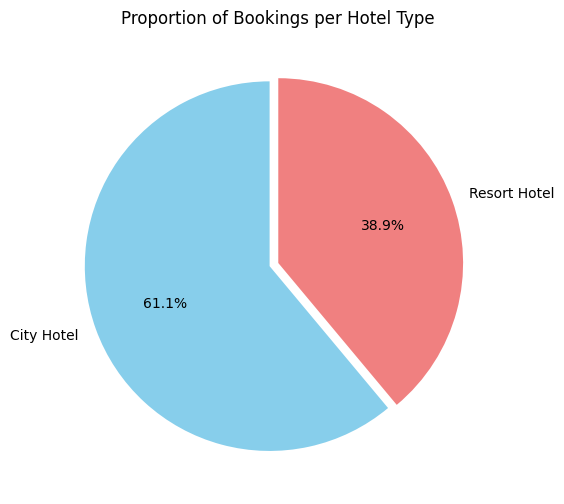

In [24]:
# Count the number of bookings per hotel type
hotel_counts = df["hotel"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct="%1.1f%%", colors=["skyblue", "lightcoral"], startangle=90, explode=[0.05, 0])
plt.title("Proportion of Bookings per Hotel Type")
plt.show()

# 📝 Insight:
The pie chart shows that 38.9% of bookings are for Resort Hotels, while the majority (61.1%) are for City Hotels. This suggests that city hotels are more frequently booked, possibly due to business travel and urban tourism.

#### Chart 2

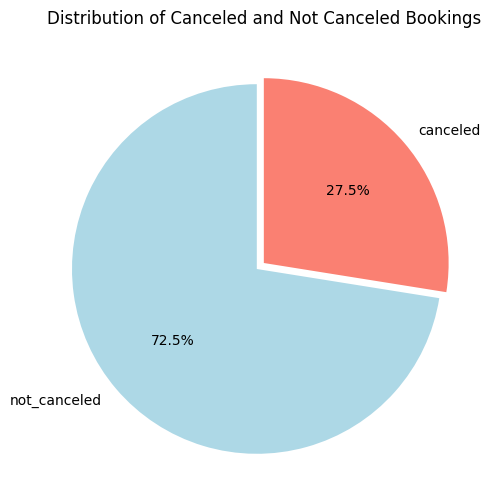

In [25]:

# Count the occurrences of each cancellation status  
cancellation_counts = df1['is_canceled'].value_counts()  

# Plot the pie chart  
plt.figure(figsize=(6, 6))  
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90,explode=[0.05, 0])  
plt.title('Distribution of Canceled and Not Canceled Bookings')  
plt.show()  


 # Insight:
The data shows that 27.5% of total bookings were canceled. This indicates a significant number of lost reservations, which can impact hotel revenue and operational planning. For stakeholders, a high cancellation rate suggests the need for strategies like stricter cancellation policies, incentives for confirmed bookings, or better demand forecasting to minimize revenue loss and optimize room availability.

#### Chart 3

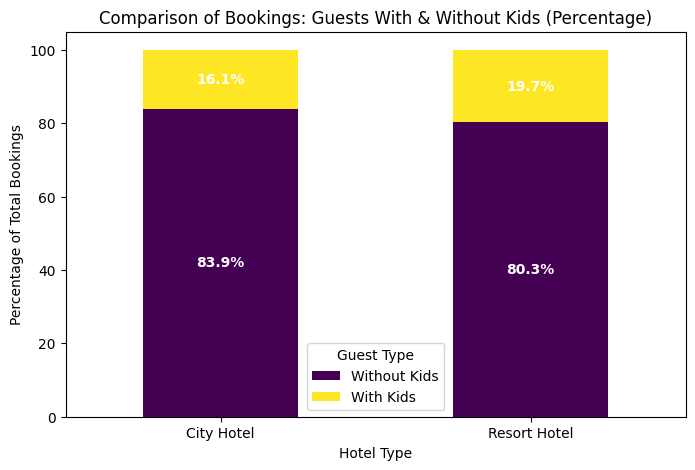

In [26]:
# Grouping data by hotel type
grouped_data = df1.groupby('hotel')[['guests_with_no_kids', 'guests_with_kids']].sum()

# Calculating percentages
grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))
grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Annotating percentages on bars
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # To avoid placing labels on empty bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X Position
                bar.get_y() + height / 2,  # Y Position
                f'{height:.1f}%',  # Formatting percentage
                ha='center', va='center', fontsize=10, color='white', fontweight='bold'
            )

# Customizing plot
plt.title('Comparison of Bookings: Guests With & Without Kids (Percentage)')
plt.ylabel('Percentage of Total Bookings')
plt.xlabel('Hotel Type')
plt.xticks(rotation=0)
plt.legend(title="Guest Type", labels=['Without Kids', 'With Kids'])

plt.show()

# Insight:
1. City hotels have 83.94% bookings from guests without kids, while resort hotels have 80.33%. This suggests that city hotels attract more solo travelers and business guests, whereas resort hotels cater slightly more to families with kids

2. There is a big bussiness opportunity stack holders can make more profit by focusing more on Guests with no kids and give them atractive offers tied up with big companies like liquir company or coke company for making more money and there is a high chances that many of them are couples so stack holder give them some offers so they can make more repeatted customers

#### Chart 4

<Figure size 1000x600 with 0 Axes>

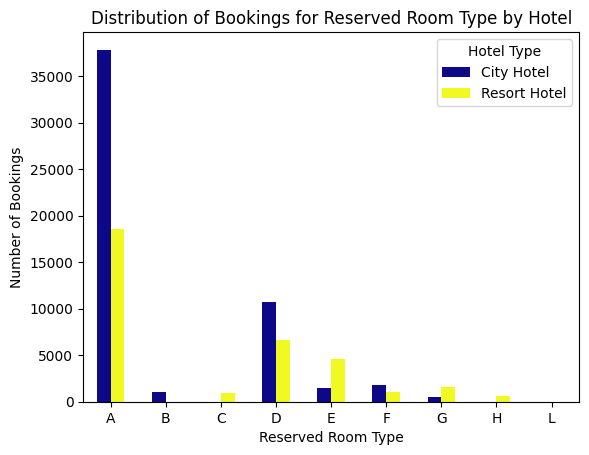

In [27]:
# Grouping data by hotel type and reserved room type
room_type_hotel_counts = df1.groupby(['reserved_room_type', 'hotel']).size().unstack()

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))
room_type_hotel_counts.plot(kind='bar', colormap='plasma')

# Customizing the chart
plt.title('Distribution of Bookings for Reserved Room Type by Hotel')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")
plt.show()

# Insights:
- I found out that A room type is more reserved room type in the all room types and L room type is very very low basically almost nothing in front of other room types in both hotels.
- we can see L room type is the lowest reserved room type so the stack holders can covert them into A room in both hotels because guests are preferring A room type most specially in city hotel so if we make L room type into A room type then customer flow gonaa increase significiantally

#### Chart 5

<Figure size 800x600 with 0 Axes>

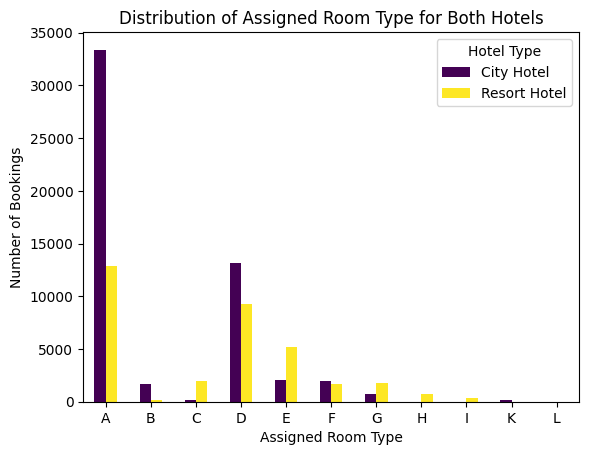

In [28]:
import matplotlib.pyplot as plt

# Grouping data by hotel type and assigned room type
assigned_room_type_counts = df1.groupby(['assigned_room_type', 'hotel']).size().unstack()

# Plotting the clustered bar chart
plt.figure(figsize=(8, 6))
assigned_room_type_counts.plot(kind='bar', colormap='viridis')

# Customizing the chart
plt.title('Distribution of Assigned Room Type for Both Hotels')
plt.xlabel('Assigned Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")
plt.show()


# Insights:
- I found out that A room type has very high demand almost 20k people reserved A room type for Resort hotel and almost 40k for City hotel but we have less than 15k rooms of A type for Resort hotel and less than 35k for City hotel.
- There is a chance for creating positivie impact on bussiness by making More A type room or converting L type to A type and this insight also tell us about one warning that we are seen that customer are reserving more A type and we have less A type room to assigne so that can lead us to negative growth if we do not solve this problem quickly and we can also increase repeatted customers by providing them thier reserved room

#### Chart 6

<Figure size 800x500 with 0 Axes>

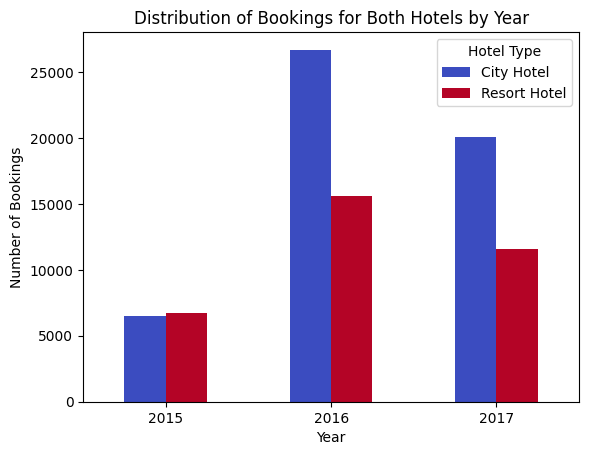

In [29]:
import matplotlib.pyplot as plt

# Grouping data by year and hotel type
yearly_bookings = df1.groupby(['arrival_date_year', 'hotel']).size().unstack()

# Plotting the clustered bar chart
plt.figure(figsize=(8, 5))
yearly_bookings.plot(kind='bar', colormap='coolwarm')

# Customizing the chart
plt.title('Distribution of Bookings for Both Hotels by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")
plt.show()


# Insights : 
- 2016 is the year there are most bookings in both hotels and in 2015 both hotels have similar count of bookings and in 2017 there is a drop in bookings but still city hotel has most bookings


#### Chart 7

<Figure size 1000x500 with 0 Axes>

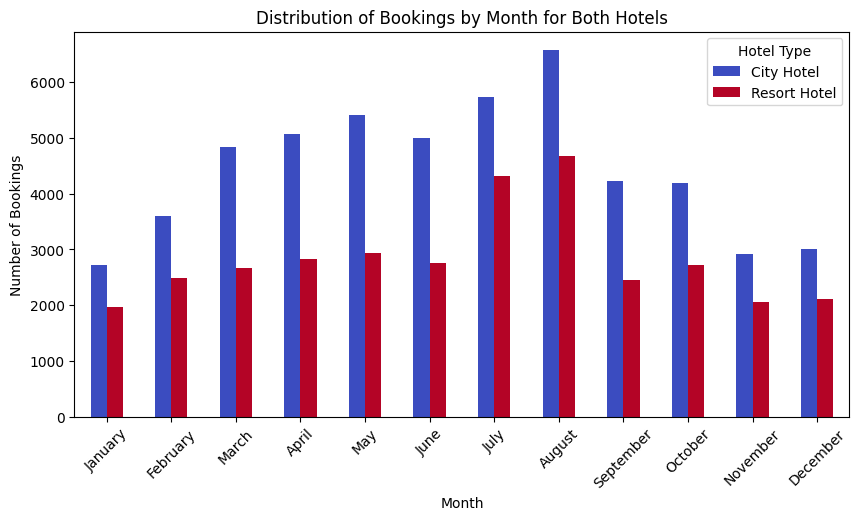

In [30]:
# Grouping data by month and hotel type
monthly_bookings = df1.groupby(['arrival_date_month', 'hotel']).size().unstack()

# Sorting months in correct order
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
monthly_bookings = monthly_bookings.reindex(months_order)

# Plotting the clustered bar chart
plt.figure(figsize=(10, 5))
monthly_bookings.plot(kind='bar', colormap='coolwarm', figsize=(10, 5))

# Customizing the chart
plt.title('Distribution of Bookings by Month for Both Hotels')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()


Insight:
- March to August (Summer Season): Bookings are high, indicating a strong demand for hotel stays.
- September to February (Winter Season): Bookings are lower, suggesting a dip in customer visits.

- Peak Season (Summers): Ensuring excellent service, managing staff, and preparing in advance can help accommodate more guests efficiently.
- Off-Peak Season (Winters): Implementing discounts, promotions, and special winter packages can attract more bookings, reducing the impact of seasonal decline.

#### Chart 8

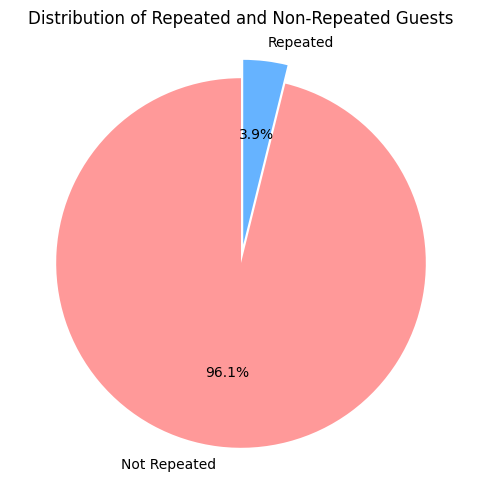

In [31]:
# Count the number of repeated and non-repeated guests
repeated_guest_counts = df1['is_repeated_guest'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(repeated_guest_counts, labels=['Not Repeated', 'Repeated'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90, explode=[0, 0.1])
plt.title('Distribution of Repeated and Non-Repeated Guests')
plt.show()


# Insights : 
- With this insight, stakeholders can recognize the low percentage of repeated guests (3.86%) and take action to improve customer retention. To encourage repeat bookings, hotels should focus on enhancing service quality, gathering guest feedback, and implementing necessary improvements. Offering loyalty programs, personalized experiences, and exclusive discounts can also help turn first-time visitors into returning customers.

#### Chart 9

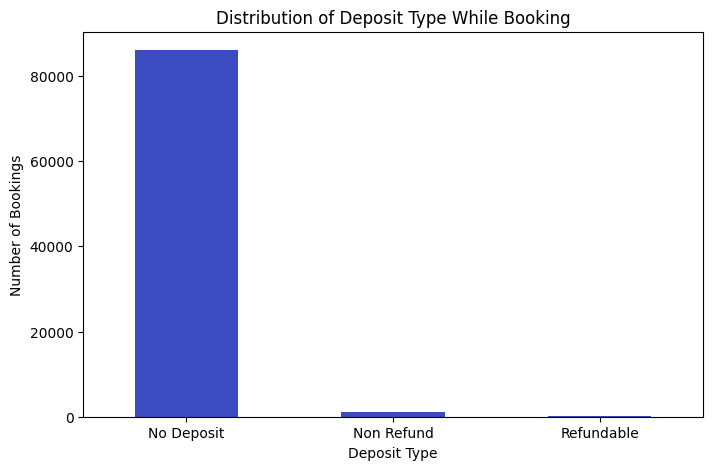

In [32]:
# Count the occurrences of each deposit type
deposit_type_counts = df1['deposit_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
deposit_type_counts.plot(kind='bar', colormap='coolwarm')
plt.title('Distribution of Deposit Type While Booking')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()


# insights : 
- Most guests do not pay any deposit in advance.

- Business Impact:
Introducing a refundable deposit policy can reduce unwanted bookings and ensure more genuine reservations. This can improve booking reliability while still allowing flexibility for guests.



#### Chart 10

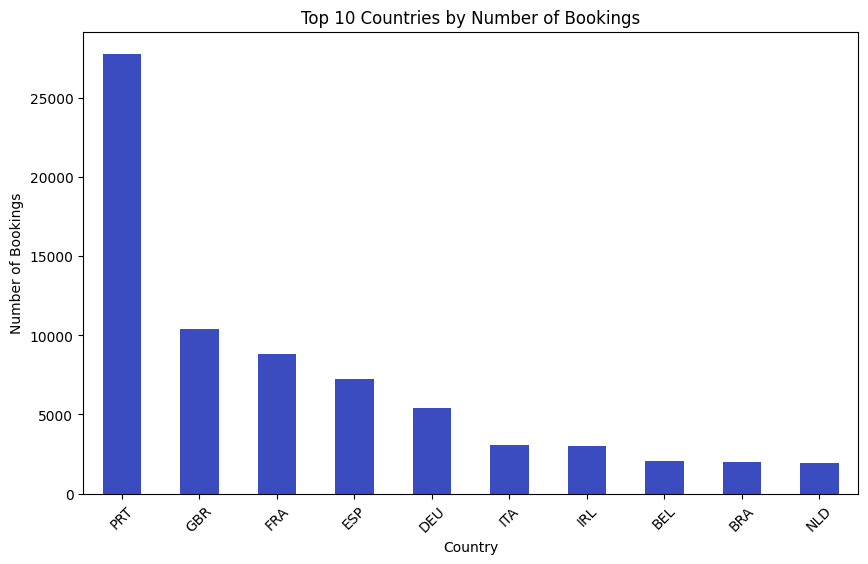

In [33]:
# Count bookings per country
country_counts = df1['country'].value_counts().head(10)  # Displaying top 10 countries

# Plot bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', colormap='coolwarm')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Countries and their Codes
- Country - Code

- Portugal - PRT
- United Kingdom - GBR
- France - FRA
- Spain - ESP
- Germany - DEU
- Italy - ITA
- Ireland - IRL
- Belgium - BEL
- Brazil - BRA
- Neitherlands - NLD

# insights :
- Since most bookings come from Portugal (PRT), followed by the UK (GBR) and France (FRA), hotels can enhance their appeal by incorporating Portuguese cultural elements, activities, and cuisine into their services. This can improve guest satisfaction and increase recommendations, driving more bookings

#### Chart 11

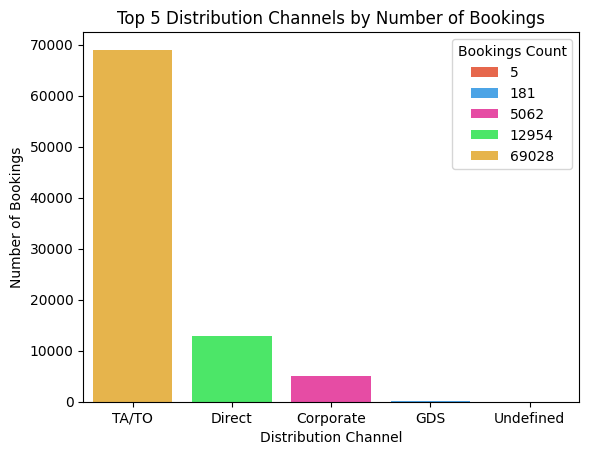

In [34]:
top_5_distribution_channel = df1['distribution_channel'].value_counts().head(5) 

# Customizing color palette with new colors
custom_palette = ['#ff5733', '#33a8ff', '#ff33a8', '#33ff57', '#ffbd33'] 

# Creating a bar plot using seaborn
sns.barplot(x=top_5_distribution_channel.index, 
            y=top_5_distribution_channel.values, 
            hue=top_5_distribution_channel.values, 
            palette=custom_palette)

# Labeling and adding title
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.legend(title='Bookings Count')
plt.title('Top 5 Distribution Channels by Number of Bookings')
plt.show()

# Insight:
- We found that most bookings are made through TA/TO (Travel Agent/Travel Officer), with a significant gap between the first and second positions. TA/TO accounts for 69,028 bookings, whereas direct bookings are only 12,964, and corporate bookings are even lower.
 
- Focusing more on direct bookings can help increase profits by reducing commission costs paid to travel agents. Additionally, relying too much on a single source (TA/TO) poses a risk—if this channel declines, it could negatively impact business. Diversifying booking sources will ensure long-term stability and growth.

#### Chart 12

/tmp/ipykernel_2179/1203827930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette=custom_palette)


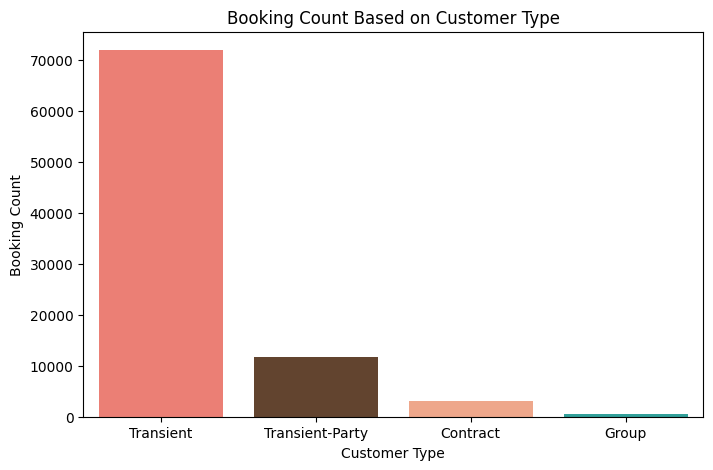

In [35]:
# Count the number of bookings for each customer type
customer_type_counts = df1['customer_type'].value_counts()

# Define a custom color palette
custom_palette = ['#FF6F61', '#6B4226', '#FFA07A', '#20B2AA']

# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette=custom_palette)

# Labeling and title
plt.xlabel('Customer Type')
plt.ylabel('Booking Count')
plt.title('Booking Count Based on Customer Type')
plt.xticks(rotation=0)
plt.show()


# Insight:
- Transient customers make up the majority of bookings. To balance this, hotels can introduce promotional offers for other customer categories, such as group discounts or corporate packages, to attract more diverse guests. Relying too much on transient guests may lead to instability in occupancy rates.









#### Chart 13

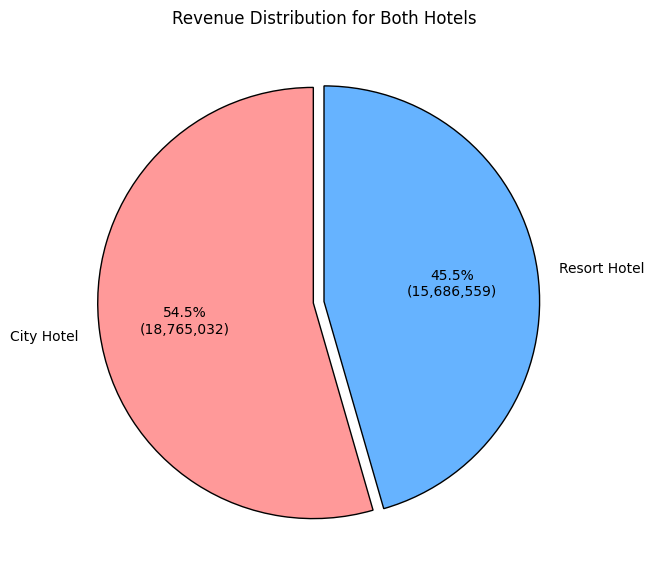

In [36]:
# Creating a new column for revenue (Assuming revenue = total nights stay * average daily rate)
df1['revenue'] = df1['total_nights_stay'] * df1['adr']

# Grouping revenue by hotel type
revenue_by_hotel = df1.groupby('hotel')['revenue'].sum()

# Plotting the Pie Chart
plt.figure(figsize=(7, 7))
colors = ['#ff9999','#66b3ff']  # Custom colors
plt.pie(revenue_by_hotel, labels=revenue_by_hotel.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(revenue_by_hotel) / 100):,})', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'},explode=[0.05, 0])

# Adding title
plt.title('Revenue Distribution for Both Hotels')

# Show the plot
plt.show()


# Insight:
- City hotels generate higher revenue than resort hotels. However, considering their booking percentage, the revenue distribution appears balanced.

- This insight helps in understanding the revenue contribution of each hotel. By identifying which hotel generates the most revenue, we can allocate more investments strategically to enhance services, attract more guests, and maximize profits.

#### Chart 14

/tmp/ipykernel_2179/3992223361.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_adr_by_month = df1.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()


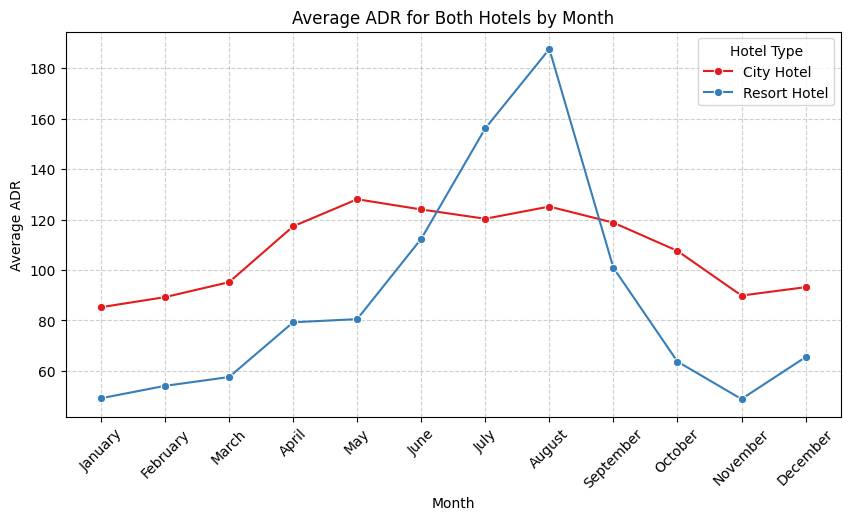

In [37]:
# Grouping data by hotel and month to calculate average ADR
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], 
                                           categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                       'July', 'August', 'September', 'October', 'November', 'December'], 
                                           ordered=True)

average_adr_by_month = df1.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_adr_by_month, x='arrival_date_month', y='adr', hue='hotel', marker='o', palette='Set1')

# Customizing the chart
plt.title('Average ADR for Both Hotels by Month')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


# Insight:
- Although resort hotels generate less revenue overall, their Average Daily Rate (ADR) surpasses that of city hotels in July and August.

**Business Impact:**
- Stakeholders can analyze what makes these months peak for resort hotels and capitalize on this opportunity. By enhancing services, promotions, or seasonal packages, they can further maximize ADR in these months. Additionally, they should assess other months where ADR is lower and identify strategies to improve performance year-round.









#### Chart 15

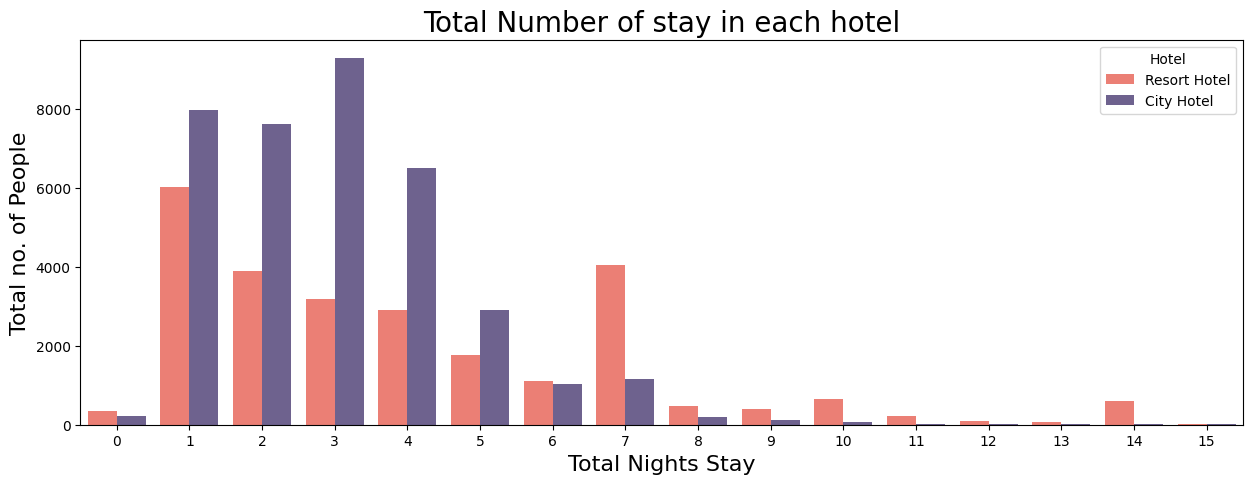

In [38]:
# Creating a not canceled Data Frame
not_canceled_df = df1[df['is_canceled']== 0]
## Creating a hotel stay Data Frame
hotel_stay = not_canceled_df[not_canceled_df ['total_nights_stay']<=15] ##Visualizing till 15 days

## Figure size and Creating a plot
plt.figure(figsize = (15,5))
sns.countplot(x= hotel_stay['total_nights_stay'],hue = hotel_stay['hotel'],palette=['#FF6F61', '#6B5B95'])
##Labeling
plt.xlabel('Total Nights Stay',fontsize = 16)
plt.ylabel('Total no. of People',fontsize = 16)
plt.title('Total Number of stay in each hotel',fontsize = 20)
plt.legend(title = "Hotel")
plt.show()

# Insight:
- Most guests prefer staying in City Hotels for 1 to 4 days, whereas Resort Hotels see a similar trend for 1 to 4 days, with an additional peak for 7-day stays.

#### Chart 16

/tmp/ipykernel_2179/1161055549.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='Set2')


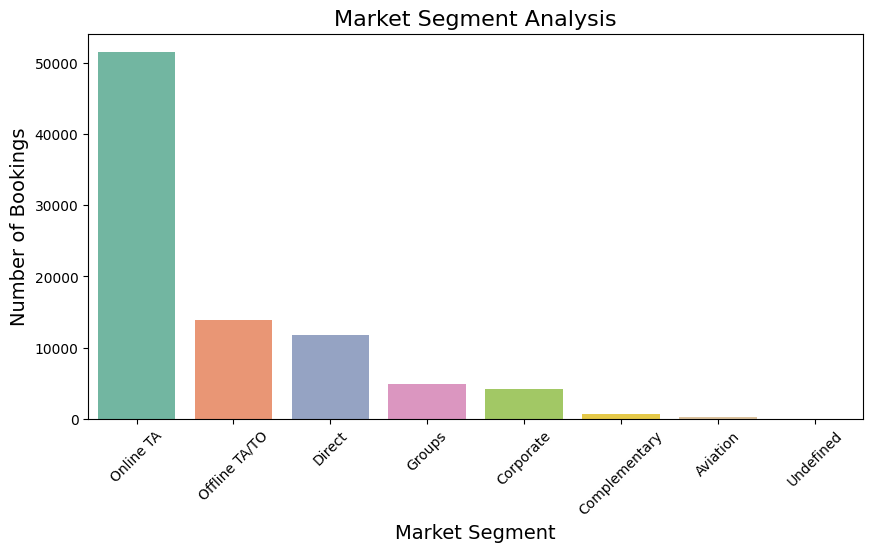

In [39]:
# Counting the number of bookings per market segment
market_segment_counts = df1['market_segment'].value_counts()

# Setting figure size
plt.figure(figsize=(10, 5))

# Creating the bar chart
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='Set2')

# Adding labels and title
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Market Segment Analysis', fontsize=16)
plt.xticks(rotation=45)  # Rotating labels for better visibility
plt.show()


#### Chart 16

<Figure size 1000x500 with 0 Axes>

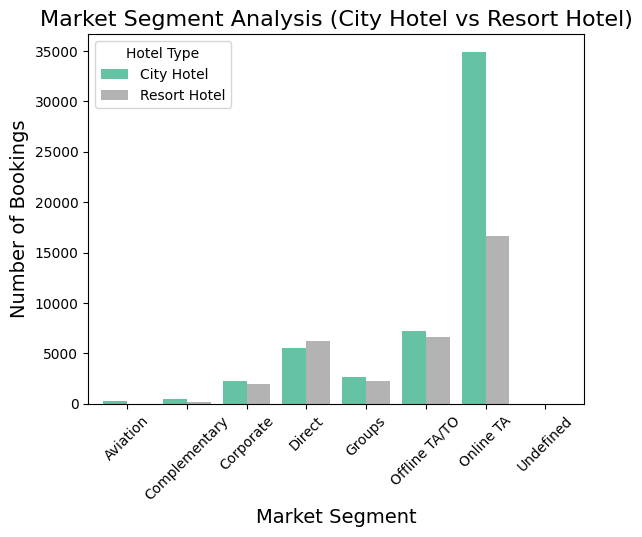

In [40]:
# Counting the number of bookings per market segment for each hotel
market_segment_counts = df1.groupby(['market_segment', 'hotel']).size().unstack()

# Setting figure size
plt.figure(figsize=(10, 5))

# Creating the clustered bar chart
market_segment_counts.plot(kind='bar', colormap='Set2', width=0.8)

# Adding labels and title
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Market Segment Analysis (City Hotel vs Resort Hotel)', fontsize=16)
plt.xticks(rotation=45)  # Rotating labels for better visibility
plt.legend(title='Hotel Type')

# Show plot
plt.show()


# Insights :
- These insights can contribute to positive business growth if we strategically promote Resort Hotels on Online Travel Agencies (OTA) by offering extra incentives or commissions to boost their visibility and bookings.

- Additionally, it's crucial to diversify booking channels instead of relying heavily on a single source like OTA. Dependence on one channel can pose a risk in the future if policies or commissions change, potentially leading to negative business growth. Exploring and strengthening other channels will ensure a more stable and sustainable revenue stream.

#### Chart 17

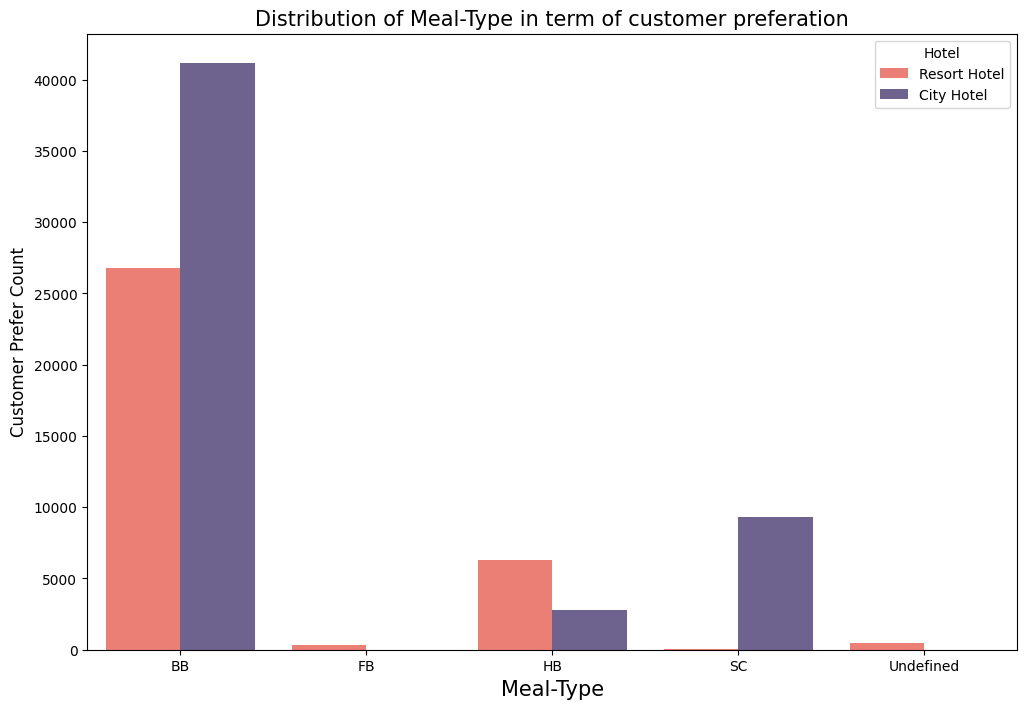

In [41]:
##setting a figure size for our chart
plt.figure(figsize = (12,8))
##creating a count plot using seaborn
sns.countplot(x = 'meal',hue = 'hotel',data = df1,palette=['#FF6F61', '#6B5B95'])
## labeling x axis
plt.xlabel("Meal-Type",fontsize = 15)
## labeling y axis
plt.ylabel("Customer Prefer Count",fontsize = 12)
## Tilte of our chart
plt.title('Distribution of Meal-Type in term of customer preferation',fontsize = 15)
## setting legend title
plt.legend(title ='Hotel')
## Displaying our chart
plt.show()

Insights from the Chart
- BB (Bed and Breakfast) is the most preferred meal type in both City and Resort hotels.
- FB (Full Board) has no demand in City hotels and very low demand in Resort hotels.
- SC (Self-Catering) is almost non-existent in Resort hotels, indicating that guests prefer meal-inclusive stays.
- **Business Impact**
 - Since BB is the most preferred option, hotels should ensure a consistent supply of high-quality breakfast to maintain customer satisfaction and encourage repeat bookings.
- Cost-cutting on FB meal type in Resort hotels can reduce wastage and save costs, as demand is minimal.
- Exploring promotions or modifications in SC meal type offerings may help attract a niche customer base in City hotels.

#### Chart 18

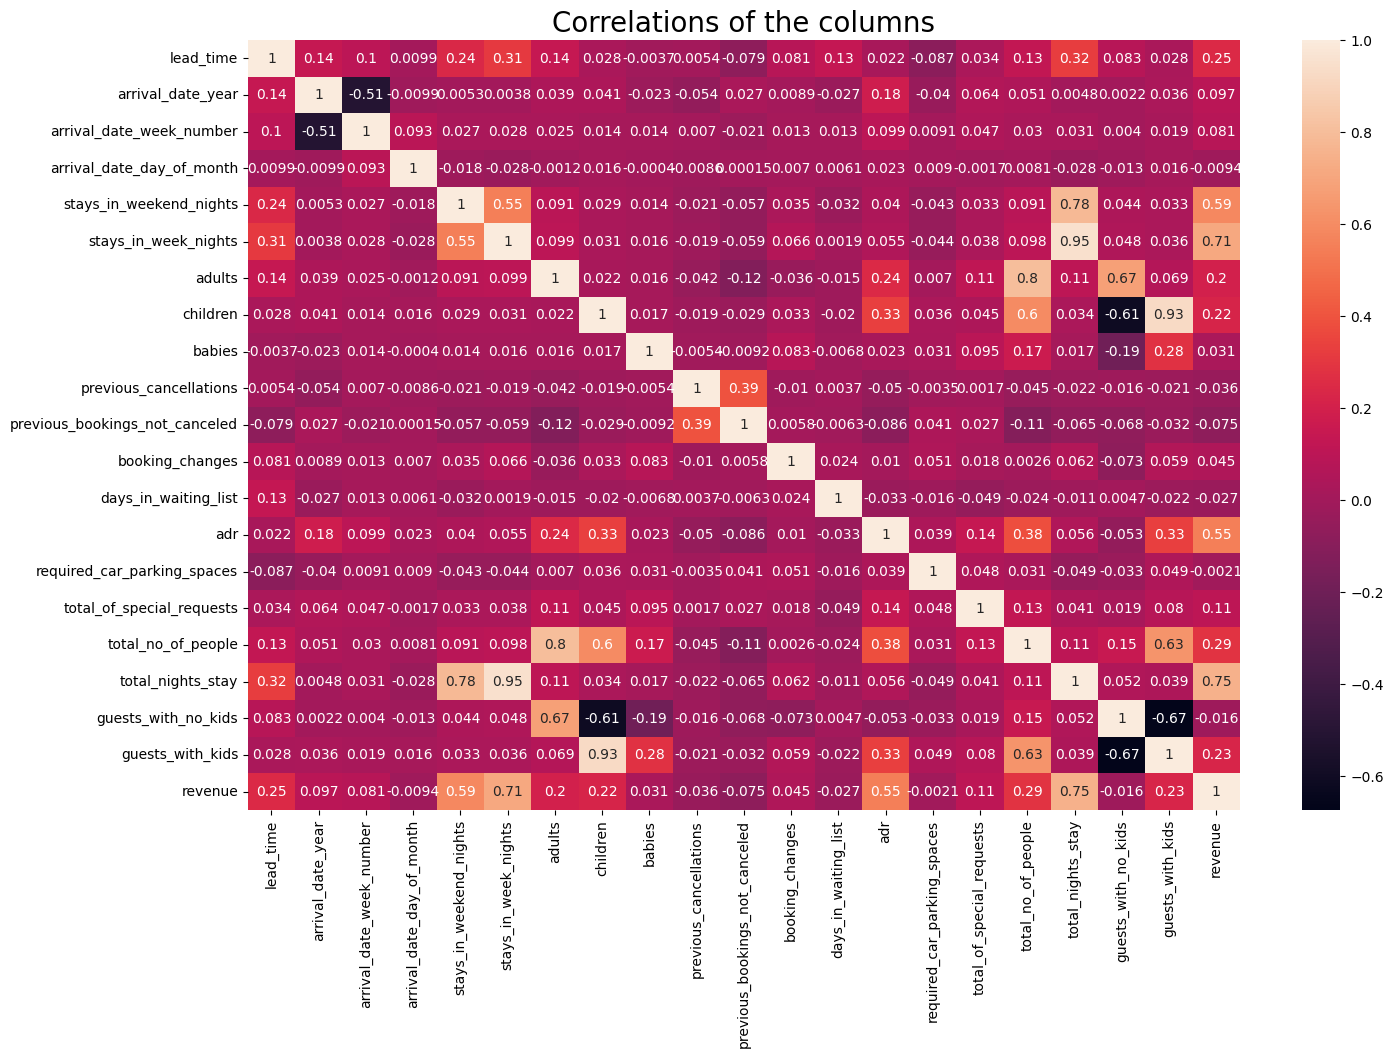

In [42]:
# Correlation Heatmap visualization code
plt.figure(figsize = (16,10))
sns.heatmap(df1.corr(numeric_only=True),annot = True)
plt.title('Correlations of the columns',fontsize= 20)
plt.show()


# Insights :
- 1.lead time and total_stay are positivily corelated if customer stays more the lead time increases.
- total_people and adr are corelated with each other.That the more the people the more the adr.
- is_repeated guest and previous bookings not cancelled has strong corelation.That mean repeated guest don't cancel their bookings

#### Chart 19

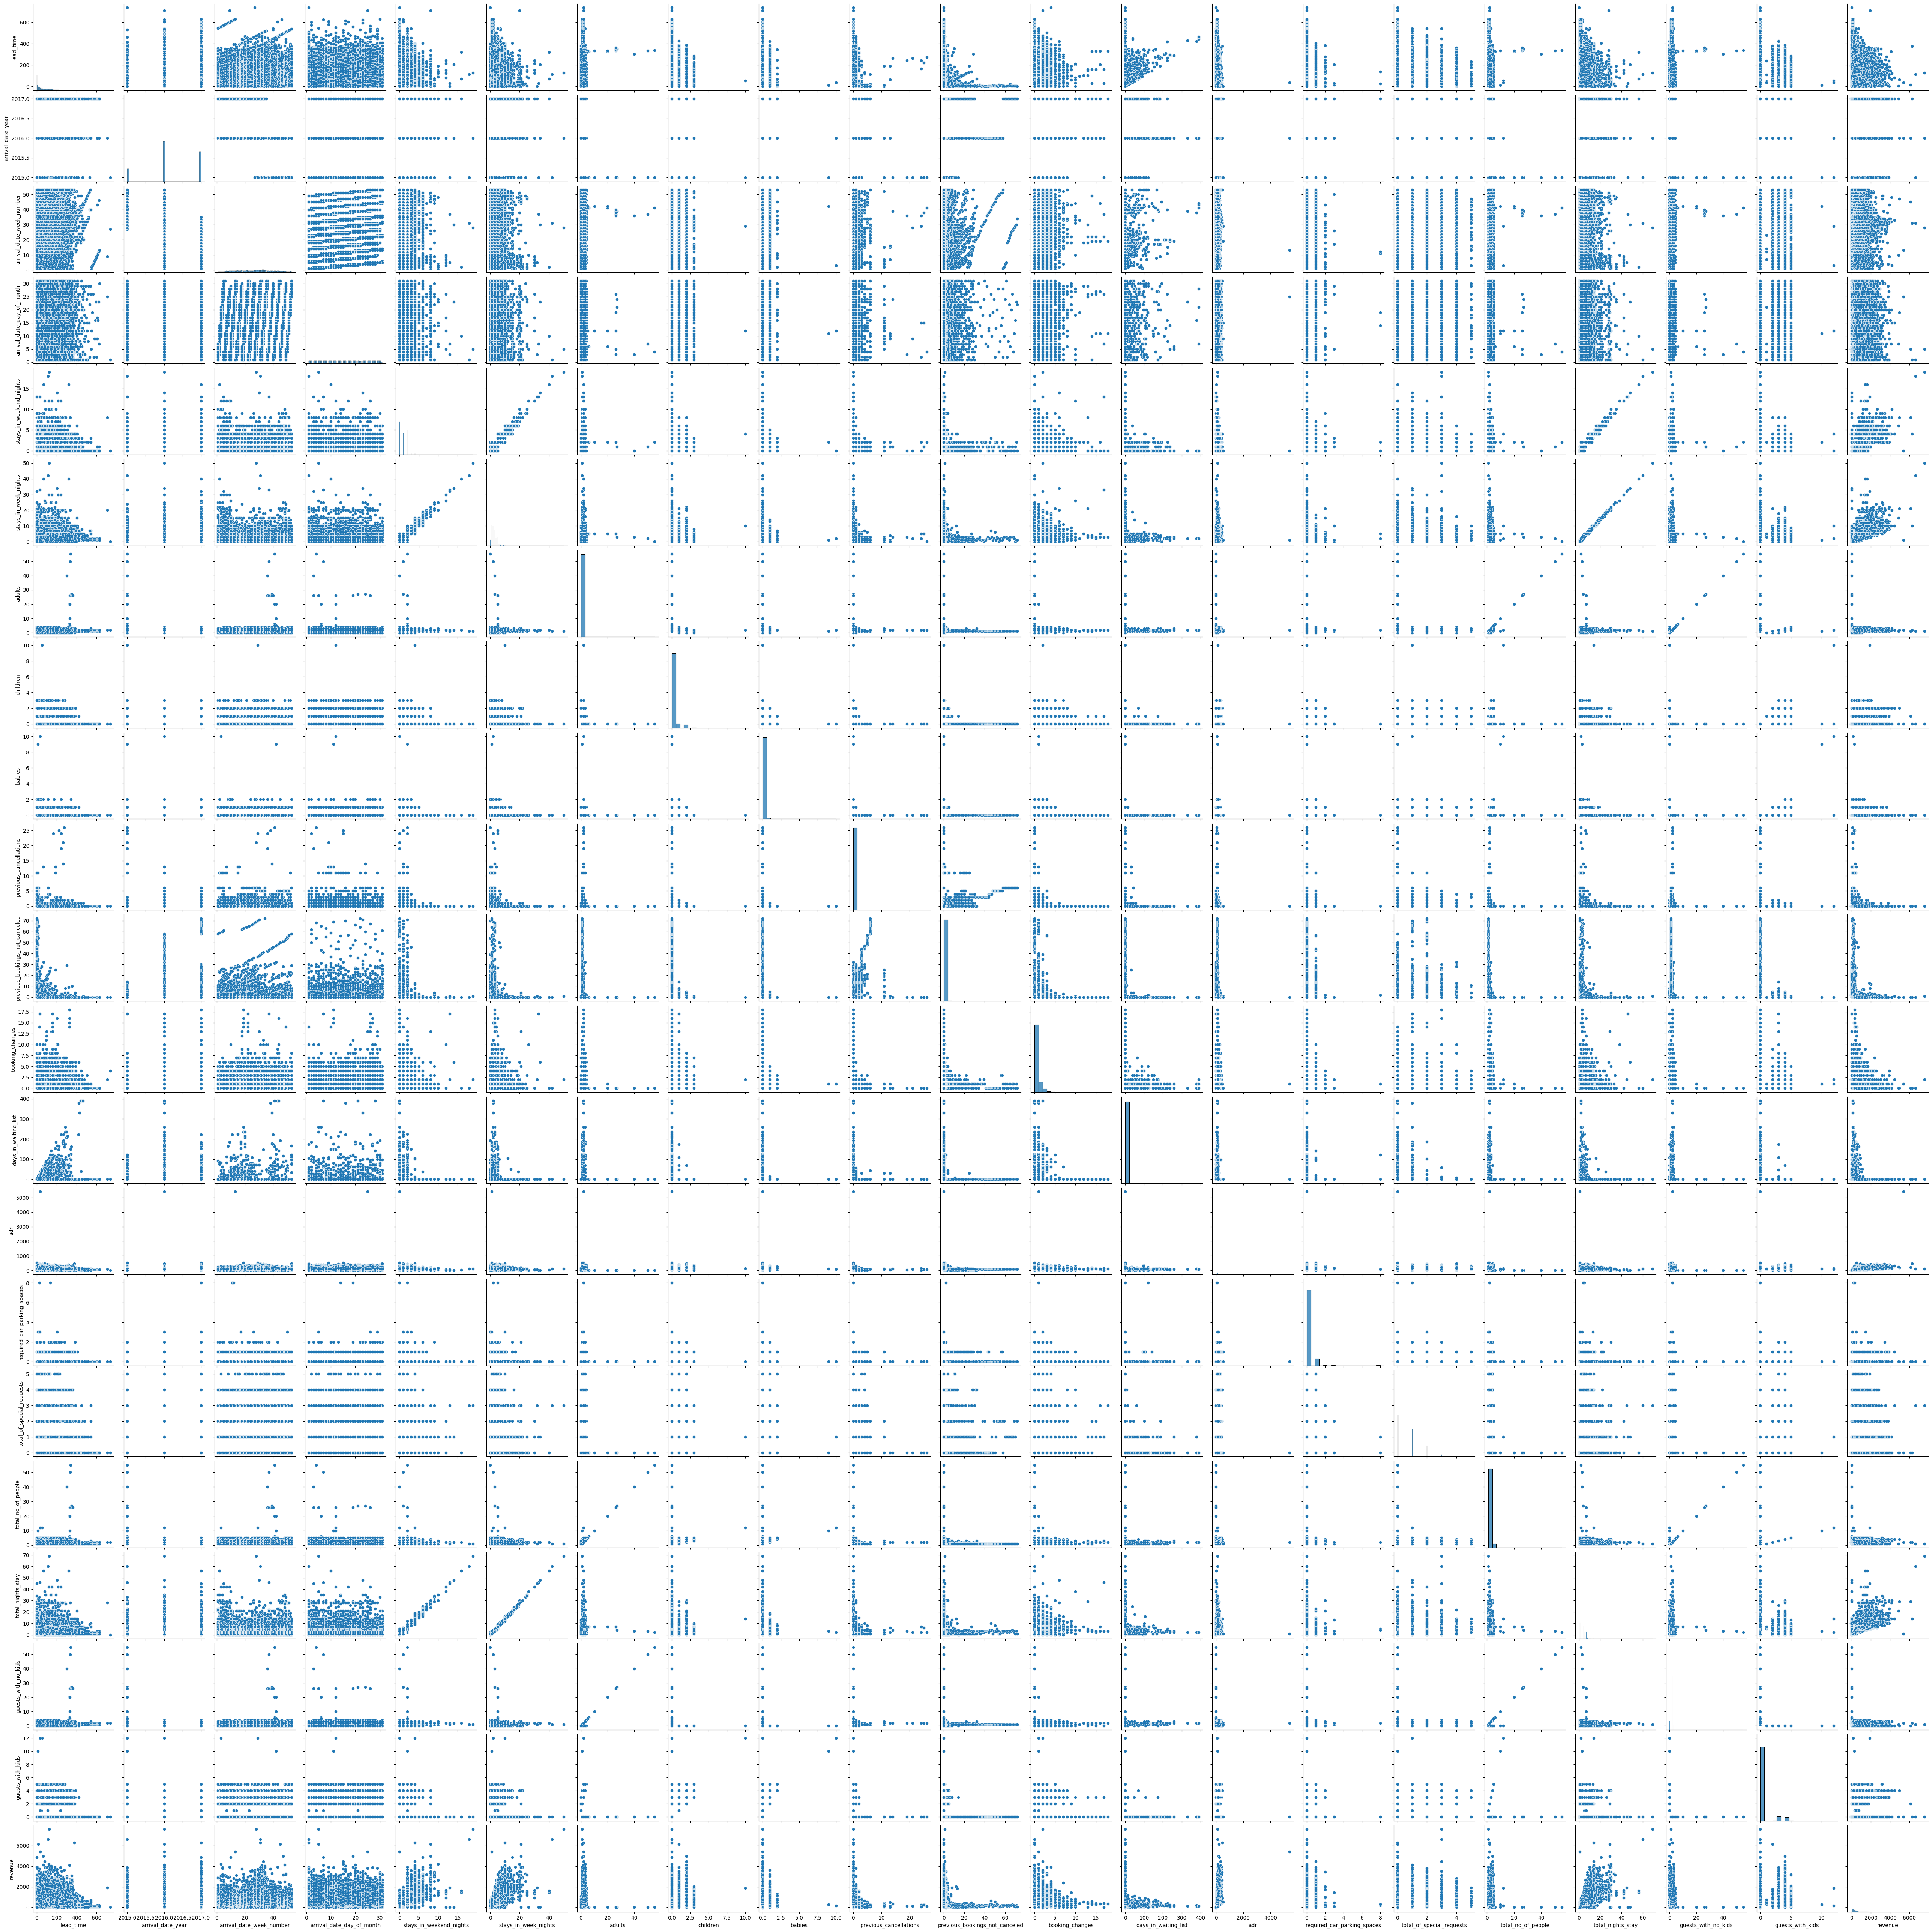

In [43]:

# Pair Plot visualization code
sns.pairplot(df1)
plt.show()

# Insights :
- 1.From the above pair chart we can see if cancellation increases then total stay also decreases 
- 2.As the total number of people increases adr also increases Thus adr are direclty proposanal to number of people

# Solution to Business Objective
**What do you suggest the client to achieve Business Objective ?**
Explain Briefly.

- 1.City Hotel is more preffered by Guests so stack holders should maintain the service in City Hotel so the repeated customers are incrased - and offer discount on Resort Hotel so the booking increases.
- 2.Around 27.52% booking are canceled and there is also no deposite while booking so stack holder should add 10% advanced payment while - booking so unnessary bookings are decreased and should offer some extra discount if customer pay full payment in advanced.
- 3.Stack holders should increase A room type because they are most preffered by guests and L room type is less preffered so convert some of - them to A type so the cost is also less.
- 4.Stack holders should have open some activity area like gaming golf and party area because there are most of the guests are not with kids.
- 5.Stack holders should also add a manditory column name martial status so they should more identify with customer needs also launch pakage - for couples.
- 6.Most of the guests are from Portugal so stack holders should add some cultral acitivity of portugal in hotel so the repeated customer - rate increases
- 7.Stack holders should also focused on other sources of bookings now on bookings are mostly come from TA/TO stack holders should increases - direct booking by giving some discounts.
- 8.Hotel should maintain the avablity of BB meal type so the customer will suggest more people to book our hotels.
- 9.Stack Holders should also add feedback system on check out and work on the feedback given by customers so stack holders know what customer wants

**Conclusion :** 
- This analysis provided valuable insights into hotel booking trends, customer preferences, and revenue patterns. City Hotel is the preferred choice among guests, while Resort Hotel sees peak demand in July and August. High cancellation rates suggest the need for an advance payment policy, and optimizing room types can improve occupancy and revenue. Expanding activities, targeting Portuguese guests, and increasing direct bookings can further boost profits. Ensuring BB meal availability and acting on customer feedback will enhance guest satisfaction and retention. Implementing these strategies will help stakeholders maximize revenue and improve overall hotel performance.

In [44]:
df1.to_excel("hotel_bookings_preprocessed_Bi.xlsx", index=False)

In [3]:
print('Done ')

Done 
